In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import json

## Load data

In [4]:
def read_bed(file):
    return pd.read_csv(file, sep='\t', header=None)

In [115]:
EXP_NAME = 'curax_14h_UNI_mm9'

In [98]:
data = read_bed(f'{EXP_NAME}.bed')
data.columns = ['chr', 'start', 'end']

data

,chr,start,end
0,chr1,4549822,4550312
1,chr1,5062248,5062630
2,chr1,6907202,6907470
3,chr1,8019995,8020610
4,chr1,9165646,9165931
...,...,...,...
1956,chrY_random,5277945,5278260
1957,chrY_random,11777722,11778059
1958,chrY_random,19640868,19641420
1959,chrY_random,28369780,28370118


## Filter out chromosomes with low data
Нам не нужны данные хромосом, где мало данных, типа chrX_random, поэтому их мы убираем

In [99]:
print(list(data.chr.value_counts().items()))

[('chrX', 192), ('chr6', 139), ('chr1', 133), ('chr3', 125), ('chr4', 118), ('chr7', 116), ('chr5', 114), ('chr2', 108), ('chr8', 102), ('chr10', 88), ('chr9', 86), ('chr17', 82), ('chr14', 80), ('chr13', 75), ('chr16', 73), ('chr11', 71), ('chr12', 70), ('chr15', 65), ('chr18', 62), ('chr19', 29), ('chrUn_random', 19), ('chrY_random', 6), ('chr8_random', 3), ('chr1_random', 2), ('chrM', 1), ('chr9_random', 1), ('chrY', 1)]


In [100]:
# Set threshold
threshold = 20

filtered_chroms = list(data.chr.value_counts()[data.chr.value_counts() > threshold].index)
data = data[sum(list((data.chr == chromosome) for chromosome in filtered_chroms)) == 1]

## Regions length statistics

In [101]:
# compute length
data['length'] = data.end - data.start
data['center'] = (data.end + data.start) // 2
data

<ipython-input-101-852514e1c528>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['length'] = data.end - data.start
<ipython-input-101-852514e1c528>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['center'] = (data.end + data.start) // 2


,chr,start,end,length,center
0,chr1,4549822,4550312,490,4550067
1,chr1,5062248,5062630,382,5062439
2,chr1,6907202,6907470,268,6907336
3,chr1,8019995,8020610,615,8020302
4,chr1,9165646,9165931,285,9165788
...,...,...,...,...,...
1949,chrX,166439843,166440321,478,166440082
1950,chrX,166441129,166441461,332,166441295
1951,chrX,166444078,166444501,423,166444289
1952,chrX,166527166,166527499,333,166527332


length mean (median in fact): 352.0
length std: 233.56105388190437
percentile 0.99: 1297.2200000000003
percentile 0.999: 2984.7030000000996
percentile 0.9995: 3323.18750000022
percentile 0.9999: 4383.037499999607


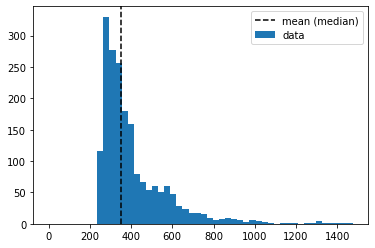

In [102]:
mean_len = data.length.median()
std_len = data.length.std()
print(f'length mean (median in fact): {mean_len}')
print(f'length std: {std_len}')
print(f'percentile 0.99: {data.length.quantile(0.99)}')
print(f'percentile 0.999: {data.length.quantile(0.999)}')
print(f'percentile 0.9995: {data.length.quantile(0.9995)}')
print(f'percentile 0.9999: {data.length.quantile(0.9999)}')

_ = plt.hist(data.length, range=(0, data.length.quantile(0.995)), bins=50, label='data')
_ = plt.axvline(mean_len, label='mean (median)', linestyle='--', c='k')
plt.legend()

In [112]:
# Set region_length and bins count
region_length = 1500
bins_count = 100

assert region_length % bins_count == 0, 'Wrong numbers, region_length % bins_count != 0'
bp_per_bin = region_length // bins_count

## Create and save final regions and global data parameters

In [114]:
regions = pd.DataFrame()
regions['chr'] = data.chr
regions['start'] = data.center - region_length // 2
regions['end'] = data.center + region_length // 2
regions

,chr,start,end
0,chr1,4549317,4550817
1,chr1,5061689,5063189
2,chr1,6906586,6908086
3,chr1,8019552,8021052
4,chr1,9165038,9166538
...,...,...,...
1949,chrX,166439332,166440832
1950,chrX,166440545,166442045
1951,chrX,166443539,166445039
1952,chrX,166526582,166528082


In [118]:
# Save regions
regions.to_csv(f'{EXP_NAME}.regions-unified.bed', sep='\t', header=None, index=None)

In [121]:
# Save global data parameters
json.dump(
    {
        'region_length': 1500,
        'bins_count': 100,
    },
    open('global_data_params.json', 'w+'),
    indent=4,
)